In [76]:
# import sys
# sys.path.append('../data_exploration')
# from stock_info import StockInfo
import backtrader as bt
import yfinance as yf
%matplotlib inline

In [66]:
cerebro = bt.Cerebro()

In [49]:
msft = yf.download('MSFT', start = '2010-01-01', end = '2014-01-01')

C:\Users\DarrenJackson\Desktop\Coding\Projects\Quantitative Trading\Project_1\venviro2\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [14]:
period = ['2010-01-01', '2014-01-01', 1]

In [50]:
my_data = msft
my_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,30.620001,31.100000,30.590000,30.950001,23.431589,38409100
2010-01-05,30.850000,31.100000,30.639999,30.959999,23.439159,49749600
2010-01-06,30.879999,31.080000,30.520000,30.770000,23.295313,58182400
2010-01-07,30.629999,30.700001,30.190001,30.450001,23.053051,50559700
2010-01-08,30.280001,30.879999,30.240000,30.660000,23.212036,51197400
...,...,...,...,...,...,...
2013-12-24,36.720001,37.169998,36.639999,37.080002,31.165817,14243000
2013-12-26,37.200001,37.490002,37.169998,37.439999,31.468409,17612800
2013-12-27,37.580002,37.619999,37.169998,37.290001,31.342327,14563000


In [51]:
feed = bt.feeds.PandasData(dataname = my_data)
feed

In [68]:
cerebro.adddata(feed)

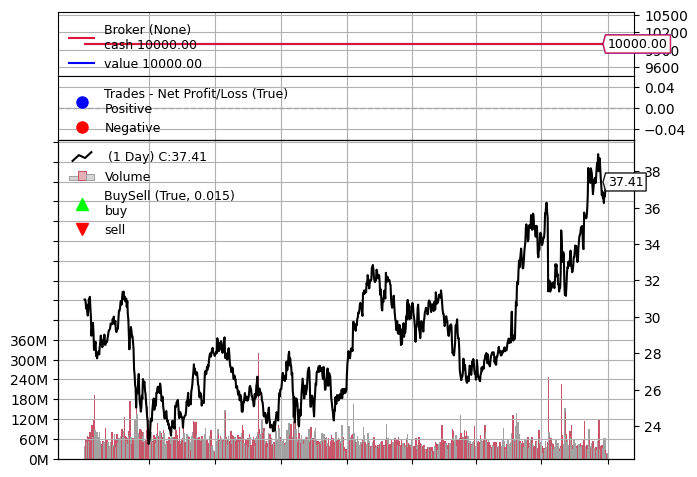

[[<Figure size 640x480 with 4 Axes>]]

In [77]:
cerebro.run()
cerebro.plot(iplot = False)

# Strategy

### My Stratgey is a mean reversion strategy. A buy signal will be triggered when a stock drops to 2 standard deviations under its running mean. The buy signal will then be generated if the stock is deemed to be 'stationary' over the same period. This 'stationary' test will be conducted using the Augmented Dickey Fuller Test. A stock will be deemed stationary if the p-value of the Dickey Fuller Test is below 0.05

In [80]:
class MyMeanReversionStrategy(bt.Strategy):

    def __init__(self):
        self.mean = bt.indicators.SimpleMovingAverage(self.data.close, period = 20)
        self.stddev = bt.indicators.StandardDeviation(self.data.close, period = 20)

    def next(self):
        buy_level = self.mean[0] - 2*self.stddev[0]
        sell_level = self.mean[0] + 2*self.stddev[0]
        if not self.position:
            if self.data.close[0] < buy_level:
                self.buy()
        elif self.data.close[0] > sell_level:
            self.close()
        
    

In [81]:
cerebro.addstrategy(MyMeanReversionStrategy)

1

In [87]:
cerebro.addsizer(bt.sizers.PercentSizer, percents=100)

In [88]:
cerebro.run()

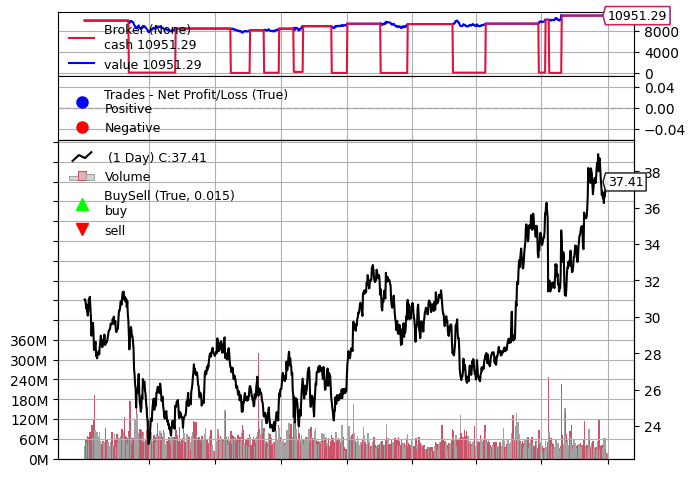

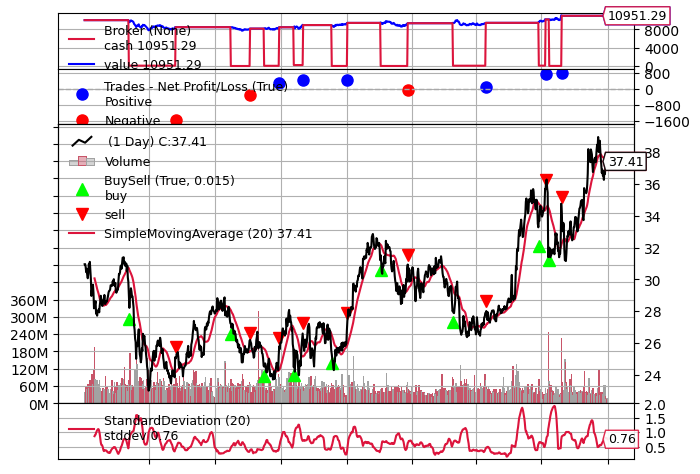

[[<Figure size 640x480 with 4 Axes>], [<Figure size 640x480 with 5 Axes>]]

In [89]:
cerebro.plot(iplot = False)